In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
df = pd.read_csv('jorhat_census.csv', header = 3)

In [3]:
df.shape
#there are 851 rows and 145 columns in the census sheet

(851, 145)

In [4]:
df_district = df.iloc[0:3,:]
df.drop([0,1,2], inplace = True)
df_sub_district = df[df['10']=='Total']

In [5]:
df_district.head()

,1,2,3,4,5,6,7,8,9,10,...,136,137,138,139,140,141,142,143,144,145
0,18,ASSAM,312,Jorhat,0,Jorhat,0,0,District - Jorhat,Total,...,18.9,6.9,4.8,14.2,33.4,55.3,11.0,0.2,10.8,0.4
1,18,ASSAM,312,Jorhat,0,Jorhat,0,0,District - Jorhat,Rural,...,15.4,4.3,2.3,16.0,25.7,60.2,13.7,0.2,13.5,0.3
2,18,ASSAM,312,Jorhat,0,Jorhat,0,0,District - Jorhat,Urban,...,31.5,16.0,13.6,8.1,60.5,37.8,1.2,0.0,1.2,0.5


In [6]:
#so let us use the census 2011 info to draw some infographic on the district as a whole
df_new = pd.read_csv('jorhat_census.csv')
df_new = df_new.ix[0,:].reset_index()
df_new.drop('index', axis = 1, inplace = True)

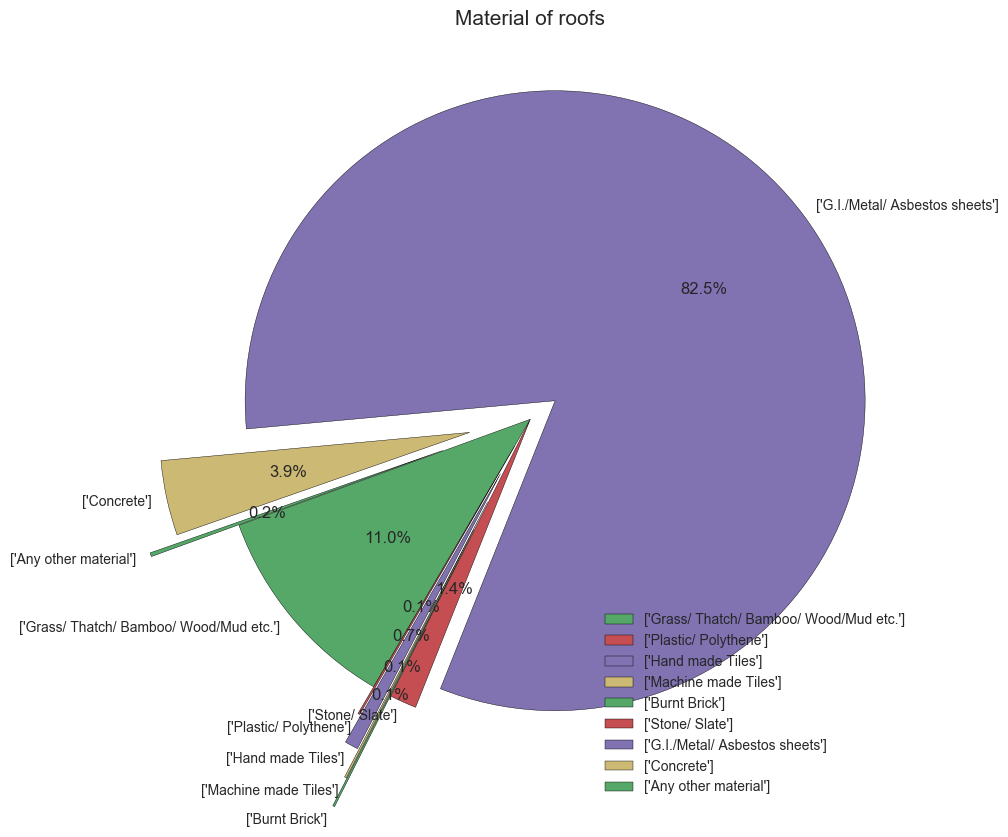

In [7]:
values = np.array(df_district.iloc[0,22:31])
labels = np.array(df_new.iloc[22:31])
plt.figure(figsize=(10,10))
explode = (0, 0.1, 0.2,0.3,0.4,0,0.1,0.2,0.3)
a,b,c = plt.pie(values, labels = labels, autopct='%1.1f%%', startangle=200, colors = color[1:5], labeldistance=1.05, explode=explode)
plt.title("Material of roofs", fontsize=15)
plt.legend(a,labels, loc="lower right")
plt.show()

In [8]:
# Thus G.I./Metal/Asbestos sheets is the most used material for roof in jorhat, 
#followed by grass/Thatch/Bamboo/Wood/Mud etc

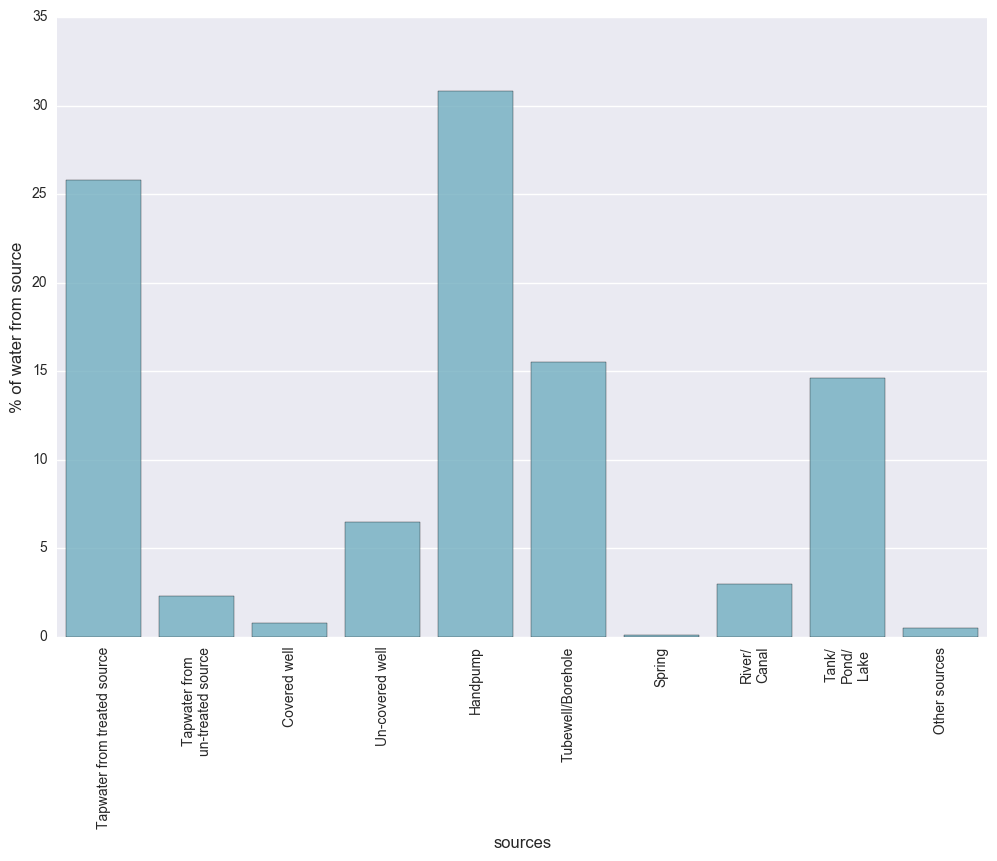

In [9]:
# now let us see the main sources of drinking water for the people of Jorhat
plt.figure(figsize=(12,8))
values = list(df_district.ix[0,71:81])
labels = df_new.ix[71:80].reset_index()
labels = list(labels[0])
sns.barplot(labels, values, alpha=0.8, color=color[5])
plt.ylabel('% of water from source', fontsize=12)
plt.xlabel('sources', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

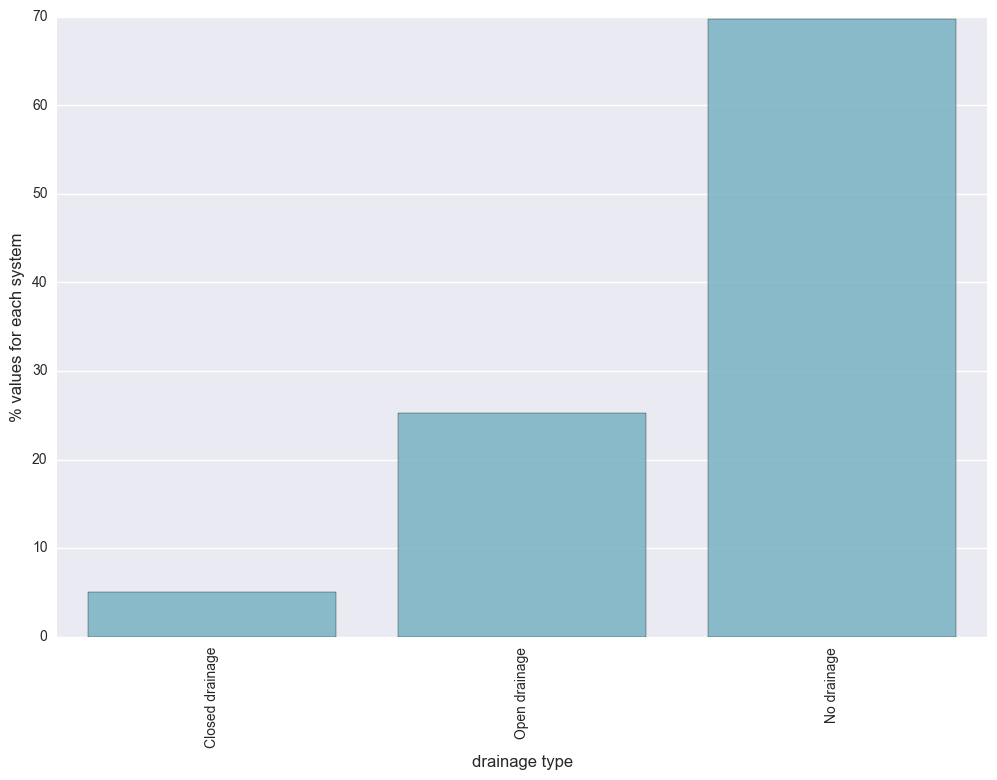

In [23]:
# Now let us consider the drainage of houses in jorhat.
plt.figure(figsize=(12,8))
values = list(df_district.ix[0,105:108])
labels = df_new.ix[105:107].reset_index()
labels = list(labels[0])
sns.barplot(labels, values, alpha=0.8, color=color[5])
plt.ylabel('% values for each system', fontsize=12)
plt.xlabel('drainage type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#From this we cannot really say that the recent water clogging in the streets is due to no drainage. 
#That is just because here we are considering the whole of jorhat which consists of both rural and urban areas.
#Now let us consider the drainage of only the urban areas.

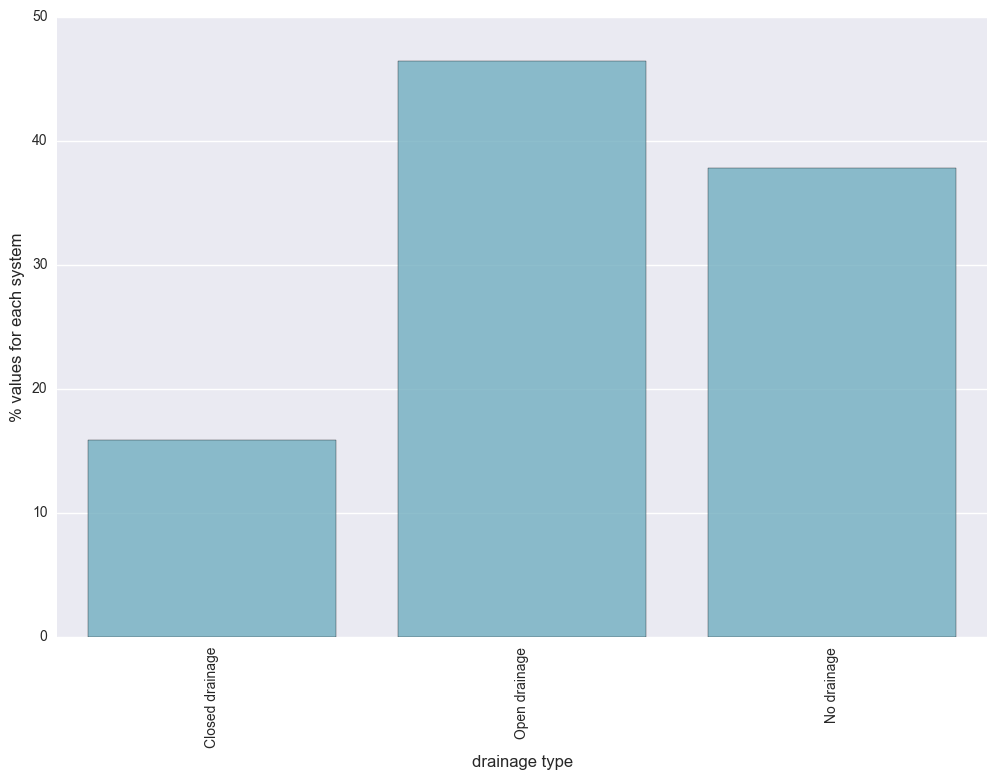

In [24]:
plt.figure(figsize=(12,8))
values = list(df_district.ix[2,105:108])
labels = df_new.ix[105:107].reset_index()
labels = list(labels[0])
sns.barplot(labels, values, alpha=0.8, color=color[5])
plt.ylabel('% values for each system', fontsize=12)
plt.xlabel('drainage type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#seems strange right about 38% of houses in urban areas in jorhat donot have DRAINAGE.

In [10]:
#There are 6 sub districts in Jorhat
#lets populate them
print(df_sub_district['9'])

3           Sub-Dist - Majuli
198    Sub-Dist - Jorhat West
346    Sub-Dist - Jorhat East
440           Sub-Dist - Teok
598        Sub-Dist - Titabor
772        Sub-Dist - Mariani
Name: 9, dtype: object


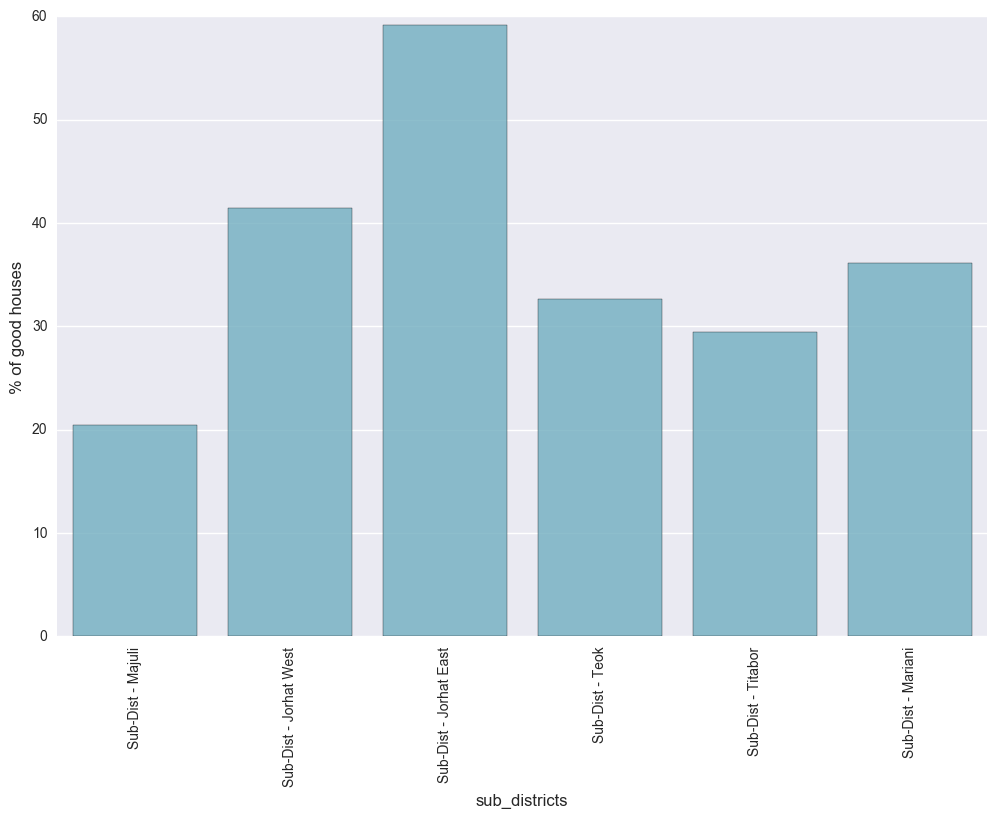

In [11]:
#so now let us compare the number of good houses in each of the subdistricts
plt.figure(figsize=(12,8))
sns.barplot(df_sub_district['9'], df_sub_district['12'], alpha=0.8, color=color[5])
plt.ylabel('% of good houses', fontsize=12)
plt.xlabel('sub_districts', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
#Jorhat East has the highest number of good houses as per census 2011.
#Let us now find the number of rural and urban wards in Jorhat East

In [13]:
a = df[df['9'] == 'Sub-Dist - Jorhat East'].index.min()
b = df[df['9'] == 'Sub-Dist - Teok'].index.min()
print(a,b)

346 440


In [14]:
df_wards = df.ix[a:(b-1),:]
df_wards.tail()

,1,2,3,4,5,6,7,8,9,10,...,136,137,138,139,140,141,142,143,144,145
435,18,ASSAM,312,Jorhat,2078,Jorhat East,801595,20,Jorhat (MB + OG) (Part) - Ward No.20,Urban,...,38.1,19.5,17.0,5.8,68.8,31.0,0.1,0.1,0.0,0.0
436,18,ASSAM,312,Jorhat,2078,Jorhat East,801595,21,Jorhat (MB + OG) (Part) - Ward No.21,Urban,...,37.1,15.9,10.2,5.4,54.0,42.8,2.9,0.3,2.6,0.3
437,18,ASSAM,312,Jorhat,2078,Jorhat East,801595,22,Jorhat (MB + OG) (Part) - Ward No.22,Urban,...,32.0,10.6,4.2,3.2,53.4,45.6,1.0,0.0,1.0,0.0
438,18,ASSAM,312,Jorhat,2078,Jorhat East,801595,23,Jorhat (MB + OG) (Part) - Ward No.23,Urban,...,12.7,7.7,7.5,26.3,31.6,66.6,1.3,0.0,1.3,0.4
439,18,ASSAM,312,Jorhat,2078,Jorhat East,801595,24,Jorhat (MB + OG) (Part) - Ward No.24,Urban,...,28.3,14.2,11.7,13.6,48.2,48.2,0.5,0.0,0.5,3.0


In [15]:
df_je_totals = df_wards.iloc[:3, :]
df_wards = df_wards.iloc[3:,:]
df_wards_rural = df_wards[df_wards['10']=='Rural']
df_wards_urban = df_wards[df_wards['10']=='Urban']
c = df_wards.shape[0]
d = df_wards_rural.shape[0]
e = df_wards_urban.shape[0]

In [16]:
print('Total wards in Jorhat East:', c)
print('Total Urban wards in Jorhat East:', e)
print('Total Rural wards in Jorhat East:', d)

Total wards in Jorhat East: 91
Total Urban wards in Jorhat East: 31
Total Rural wards in Jorhat East: 60


In [26]:
#let us now find the urban and rural wards in Jorhat east, that have the highest and lowest number of good houses

In [43]:
rural_max = df_wards_rural['12'].max()
rural_max = df_wards_rural[df_wards_rural['12']==rural_max]
rural_min = df_wards_rural['12'].min()
rural_min = df_wards_rural[df_wards_rural['12']==rural_min]
print('Rural wards in Jorhat East with good housing:', list(rural_max['9']))
print(' ')
print('Rural wards in Jorhat East with dilapidated housing:', list(rural_min['9']))

Rural wards in Jorhat East with good housing: ['Kaibarta Salatdia', 'Koibarta Gaon']
 
Rural wards in Jorhat East with dilapidated housing: ['Nemati Chapori', 'Hatisal Chapori', 'Chomoni Chapori', 'Major Chapori', 'Mohkhuti Pathar', 'Alichiga Pathar', 'Phukanar Khat', 'Khata Pathar', 'Barhoipam']


In [44]:
urban_max = df_wards_urban['12'].max()
urban_max = df_wards_urban[df_wards_urban['12']==urban_max]
urban_min = df_wards_urban['12'].min()
urban_min = df_wards_urban[df_wards_urban['12']==urban_min]
print('Urban wards in Jorhat East with good housing:', list(urban_max['9']))
print(' ')
print('Urban wards in Jorhat East with dilapidated housing:', list(urban_min['9']))

Urban wards in Jorhat East with good housing: ['Jorhat (MB + OG) (Part) - Ward No.6']
 
Urban wards in Jorhat East with dilapidated housing: ['Jorhat (MB + OG) (Part) - Ward No.23']
